# TELEPORTATION

000 -> topmost qubit is the rightmost

In [10]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random
from qiskit.circuit.library import XGate, HGate
import matplotlib.pyplot as plt


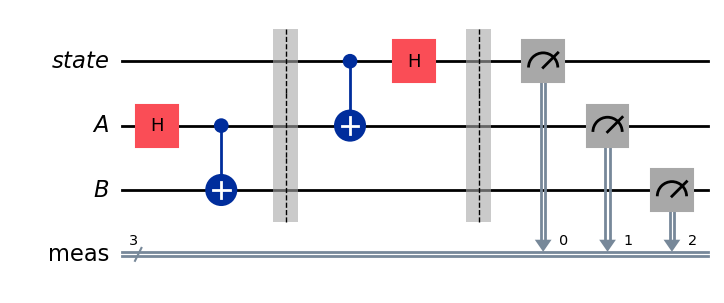

In [7]:
state = QuantumRegister(1, "state")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
cr = ClassicalRegister(2, 'cr')
protocol = QuantumCircuit(state, A, B)

protocol.h(A)
protocol.cx(A, B)
protocol.barrier()

protocol.cx(state, A)
protocol.h(state)

protocol.measure_all()

protocol.draw("mpl")

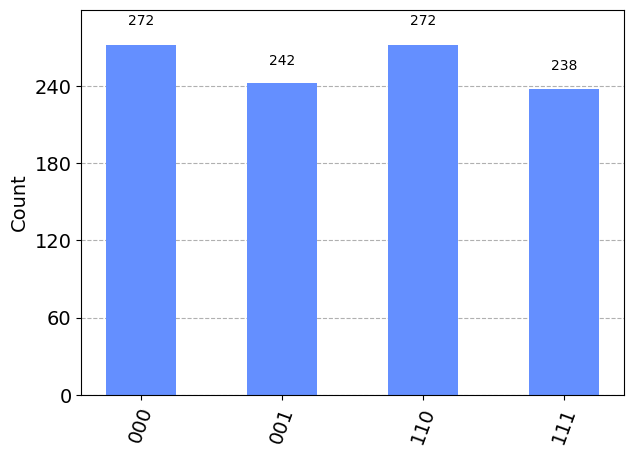

In [8]:

result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

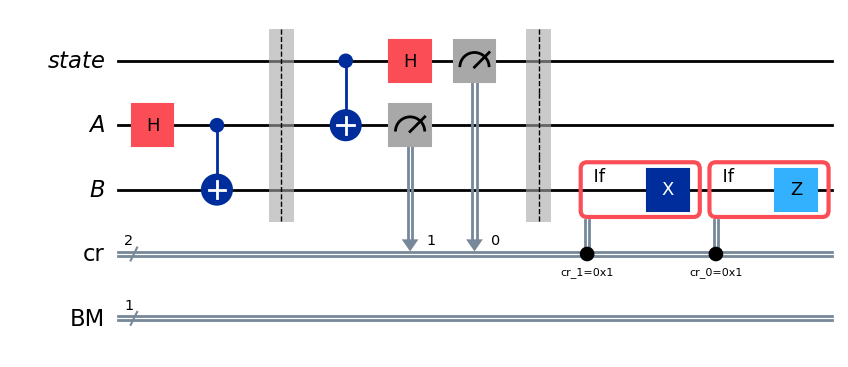

In [20]:
 
state = QuantumRegister(1, "state")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
cr = ClassicalRegister(2, 'cr')
BM = ClassicalRegister(1, "BM")
protocol = QuantumCircuit(state, A, B, cr, BM)

protocol.h(A)
protocol.cx(A, B)
protocol.barrier()

protocol.cx(state, A)
protocol.h(state)
protocol.measure(state, cr[0])
protocol.measure(A, cr[1])
protocol.barrier()

with protocol.if_test((cr[1], 1)):
    protocol.x(B)
with protocol.if_test((cr[0], 1)):
    protocol.z(B)
 
#protocol.measure_all()

protocol.draw("mpl")
 

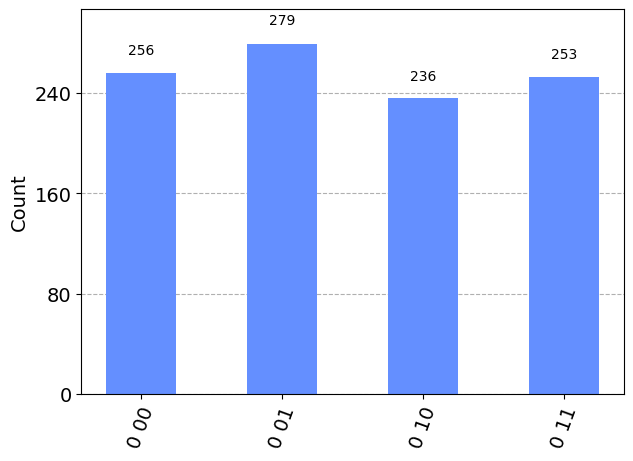

In [21]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

In [22]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[-0.25445346+0.j        , -0.33638719+0.9066957j ],
       [ 0.84313904+0.4736771j , -0.19401299+0.16463755j]])

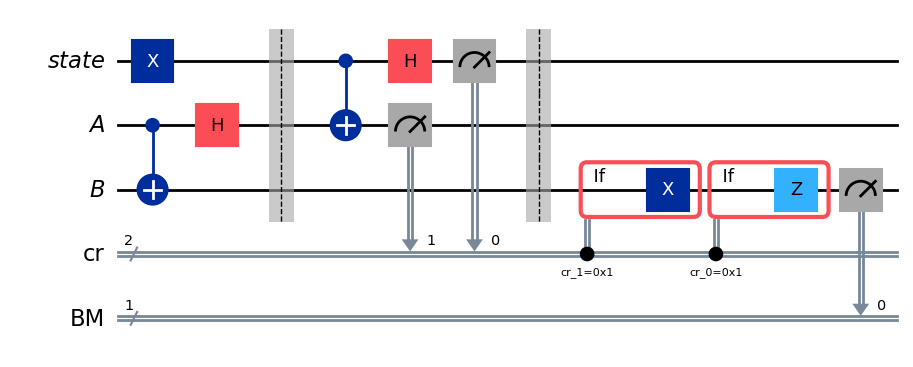

In [48]:

gate = XGate() #random_gate, XGate()
test_protocol = QuantumCircuit(state, A, B)

state = QuantumRegister(1, "state")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
cr = ClassicalRegister(2, 'cr')
BM = ClassicalRegister(1, "BM")
protocol = QuantumCircuit(state, A, B, cr, BM)

protocol.append(gate, state)
protocol.cx(A, B)
protocol.h(A)
protocol.barrier()

protocol.cx(state, A)
protocol.h(state)
protocol.measure(state, cr[0])
protocol.measure(A, cr[1])
protocol.barrier()

with protocol.if_test((cr[1], 1)):
    protocol.x(B)
with protocol.if_test((cr[0], 1)):
    protocol.z(B)

#protocol.append(gate.inverse(), B)

protocol.measure(B, BM)

protocol.draw("mpl")

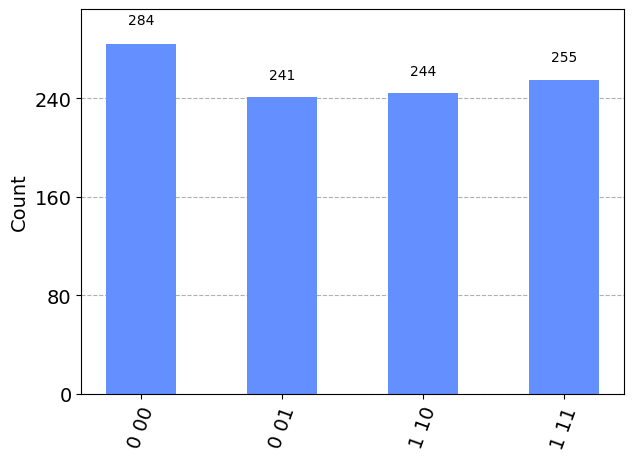

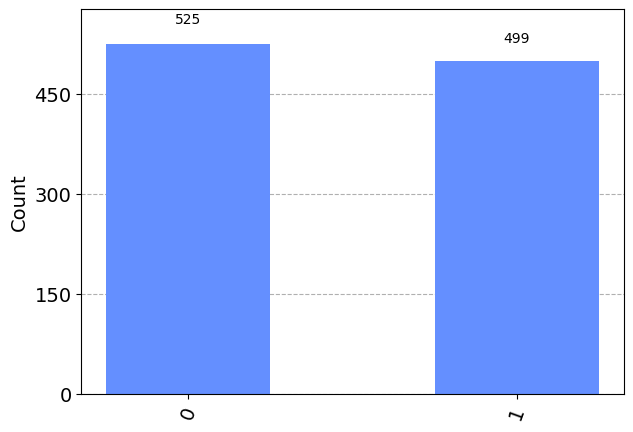

In [49]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))
#statevector = result.get_statevector()

filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

# # Get the state of qubit 3 by tracing out other qubits
# qubit_3_state = statevector.reshape((2, 2, 2, 2, 2)).sum(axis=(0, 2, 3, 4))

# # Print or visualize the state of qubit 3
# print("State of qubit 3:", qubit_3_state)
# plot_state_qsphere(qubit_3_state)  # Visualize the state on a Q-sphere

# ENTANGLEMENT

In [18]:
qr = QuantumRegister(2, 'q')
qc = QuantumCircuit(qr)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

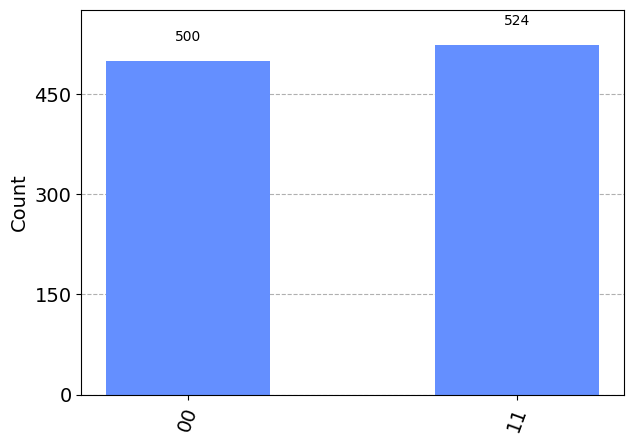

In [20]:
result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))